In [1]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from DataSets import LyricsDataset, JobDescDataset
from Data_Reader import Spotify_Data_Reader, Linkedin_Data_Reader
from Bert_Trainer import Bert_Trainer
from Bert_Trainer import Bert_Trainer


reader_spot = Spotify_Data_Reader()
_, _, x_val_spot, y_val_spot = reader_spot.read_test_val()
num_labels_spot = reader_spot.get_num_labels()


reader_linkedin = Linkedin_Data_Reader()
_, _, x_val_linkedin, y_val_linkedin = reader_linkedin.read_test_val()
num_labels_linkedin = reader_linkedin.get_num_labels()

idx_to_genre = ['ELECTRIC', 'HEAVY METAL', 'ROCK', 'TRADITIONAL', 'POP', 'RNB', 'COMEDY', 'FUNK', 'AMBIENT', 'JAZZ']
idx_to_job = ['sales', 'nurse', 'human resources', 'accountant', 'developer', 'project manager', 'customer service', 'attorney', 'teacher', 'therapist']

In [2]:
def extract_bert_features(input_texts, tokenizer, model, device):
  features = []
  for i, text in enumerate(input_texts):
    input = tokenizer.encode(text, truncation=True,
                             return_tensors="pt").to(device)
    
    hidden_states = model(input, output_hidden_states = True).hidden_states

    feature = torch.stack(hidden_states)[1:, :, 0, :].reshape((12,768)).detach().cpu().numpy()

    assert feature.shape == (12, 768)
    features.append(feature)

  return np.stack(features)

In [ ]:
def plot_tsne(model_name, DataSet, x, y, num_labels, label_idx_map, title):
    trainer = Bert_Trainer(num_labels, DataSet, 'TSNE_TEST')
    trainer.load_model(model_name)

    tokenizer = trainer.tokenizer
    model = trainer.model
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)


    features = extract_bert_features(x, tokenizer, model, device)
    tsne_cls = TSNE(n_components=2, random_state=42).fit_transform(features.reshape((-1, 12*768)))

    plt.figure(figsize=(12, 9))

    unique_labels = set(y)

    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # Generate distinct colors

    # Create a color map for each class
    class_to_color = {cls: colors[i] for i, cls in enumerate(unique_labels)}

    # Plotting the scatter plot
    for cls in unique_labels:
        # Filter points by their class
        class_points = tsne_cls[np.array(y) == cls]
        plt.scatter(class_points[:, 0], class_points[:, 1], color=class_to_color[cls], label=f'{label_idx_map[cls]}')

    plt.legend()
    plt.title(f'{title} t-SNE Embeddings Scatter Plot') 
    plt.xlabel('t-SNE Dimension 1') 
    plt.ylabel('t-SNE Dimension 2') 
    plt.show()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1776, 2)
1776


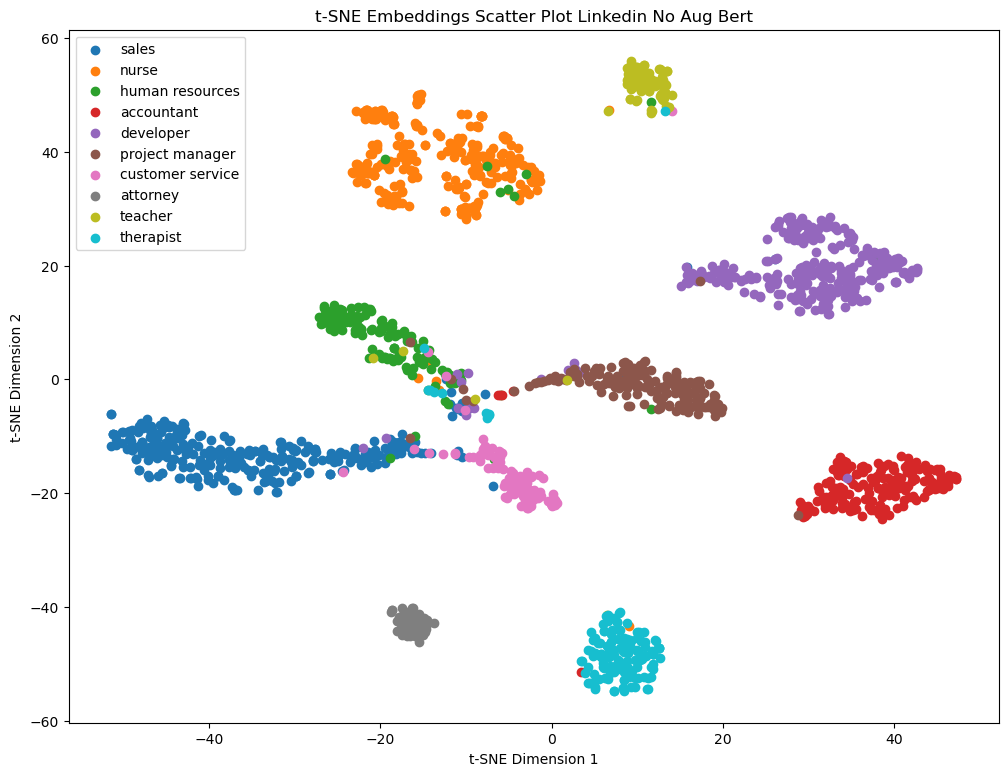

In [6]:
plot_tsne('linkedin_noaug_bert', 
          JobDescDataset, 
          x_val_linkedin,
          y_val_linkedin, 
          num_labels_linkedin, 
          idx_to_job, 
          'Linkedin No Aug Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1776, 2)
1776


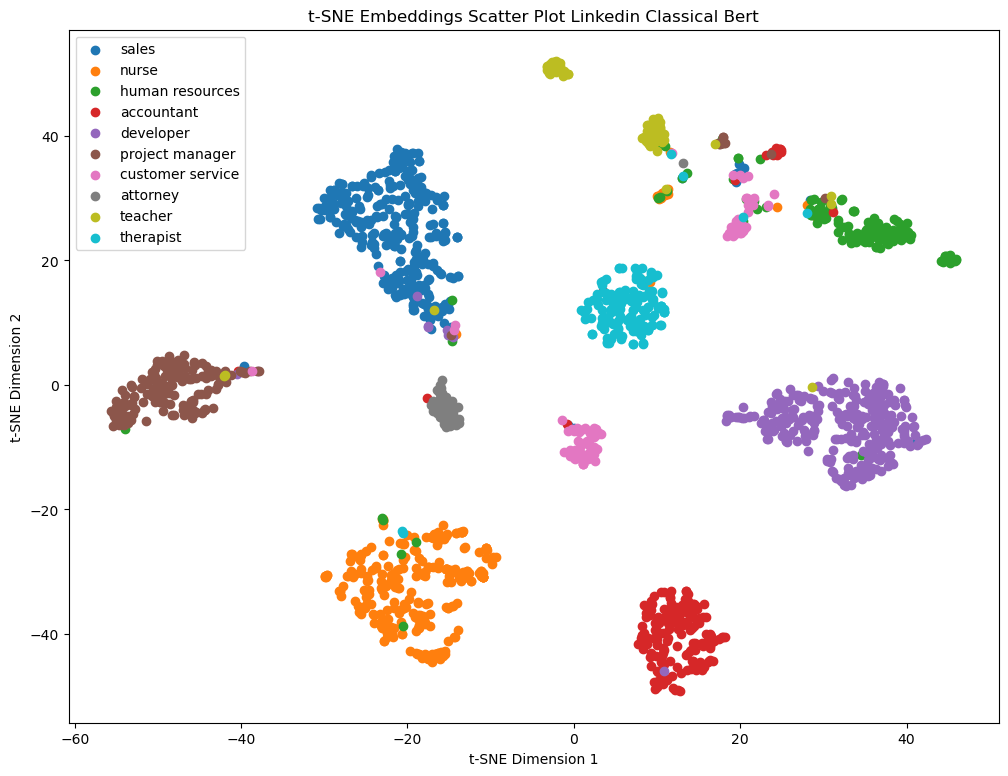

In [7]:
plot_tsne('linkedin_classical_bert', 
          JobDescDataset, 
          x_val_linkedin,
          y_val_linkedin, 
          num_labels_linkedin, 
          idx_to_job, 
          'Linkedin Classical Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1776, 2)
1776


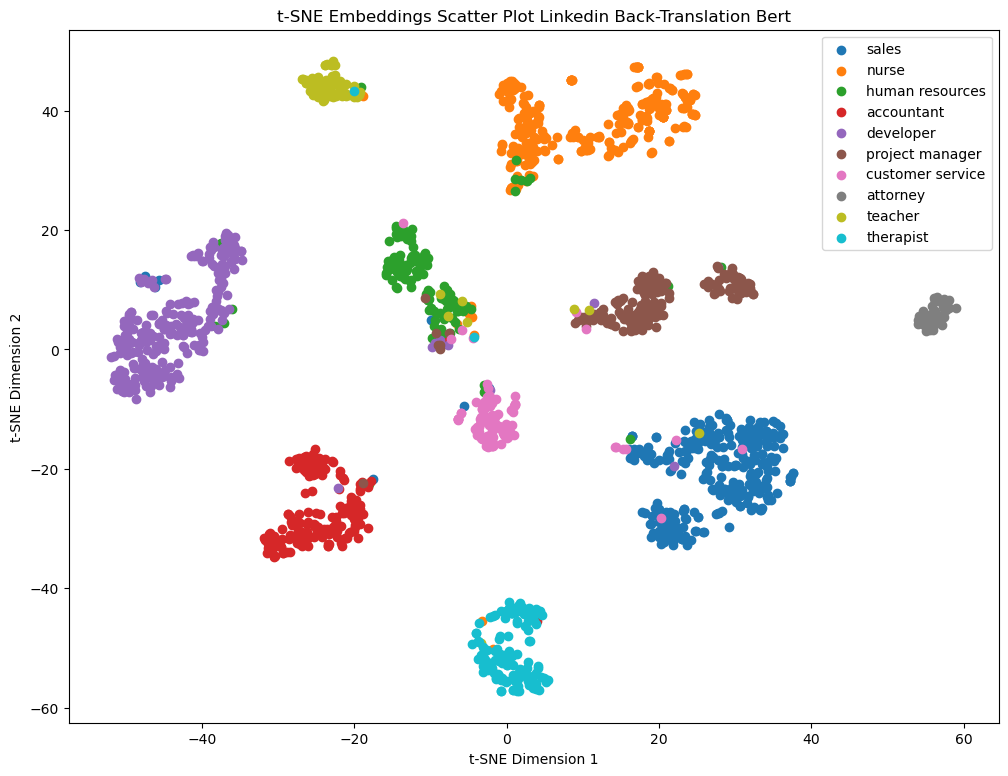

In [8]:
plot_tsne('linkedin_backtrans_bert', 
          JobDescDataset, 
          x_val_linkedin,
          y_val_linkedin, 
          num_labels_linkedin, 
          idx_to_job, 
          'Linkedin Back-Translation Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1776, 2)
1776


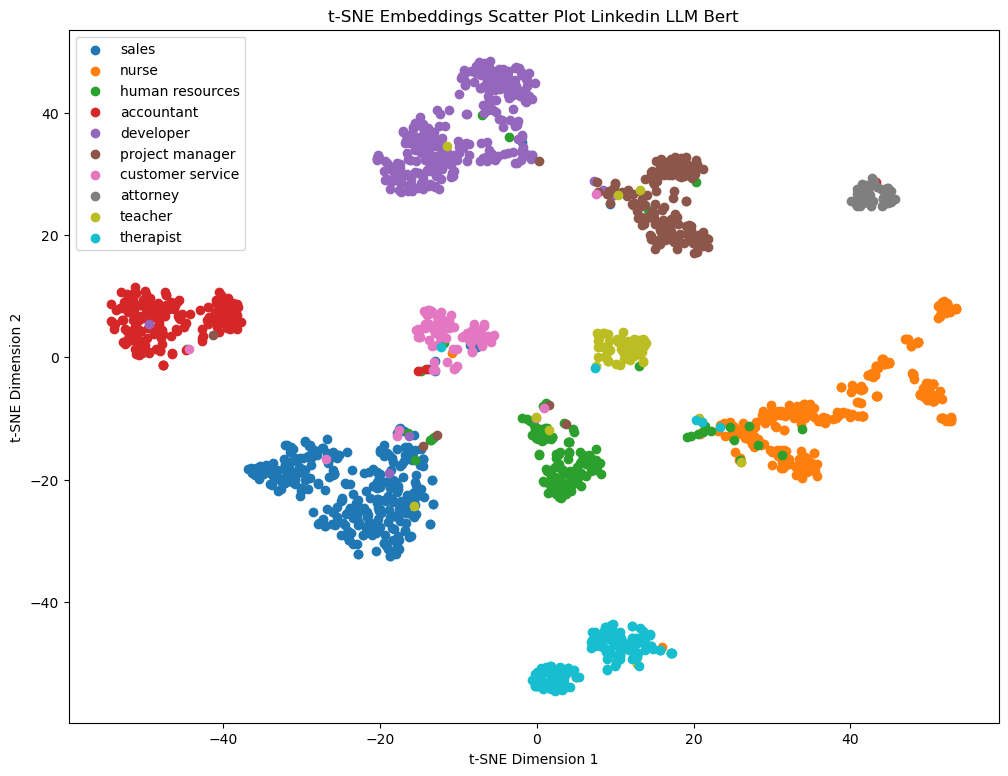

In [9]:
plot_tsne('linkedin_llm_bert', 
          JobDescDataset, 
          x_val_linkedin,
          y_val_linkedin, 
          num_labels_linkedin, 
          idx_to_job, 
          'Linkedin LLM Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1552, 2)
1552


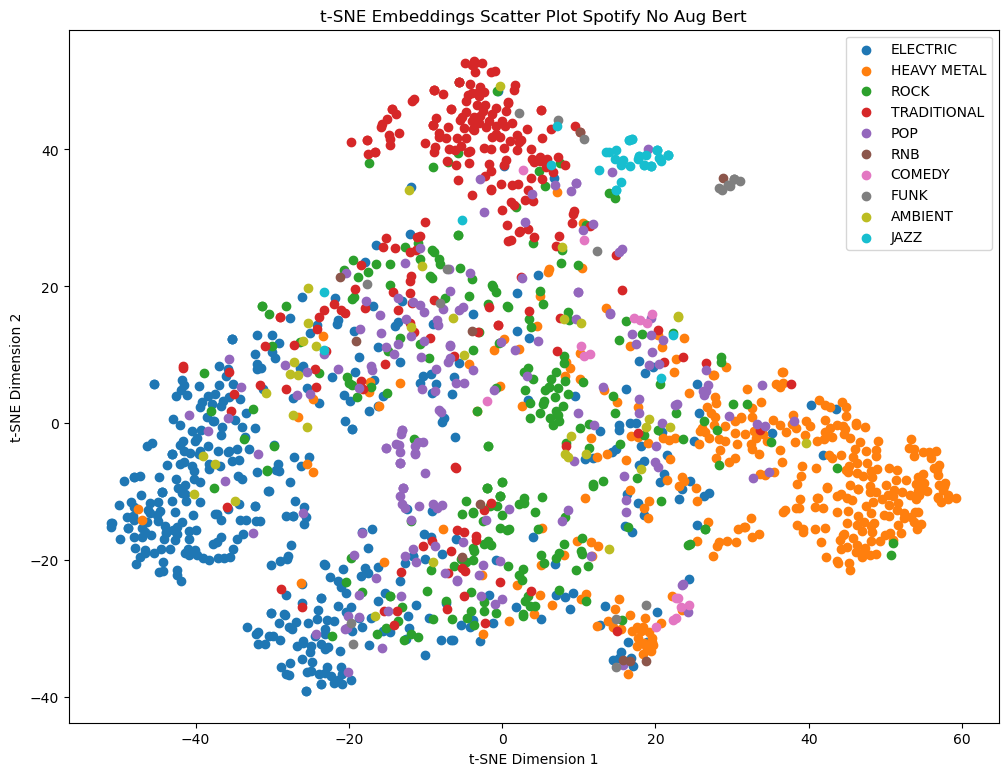

In [10]:
plot_tsne('spotify_noaug_bert', 
          LyricsDataset, 
          x_val_spot,
          y_val_spot, 
          num_labels_spot, 
          idx_to_genre, 
          'Spotify No Aug Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1552, 2)
1552


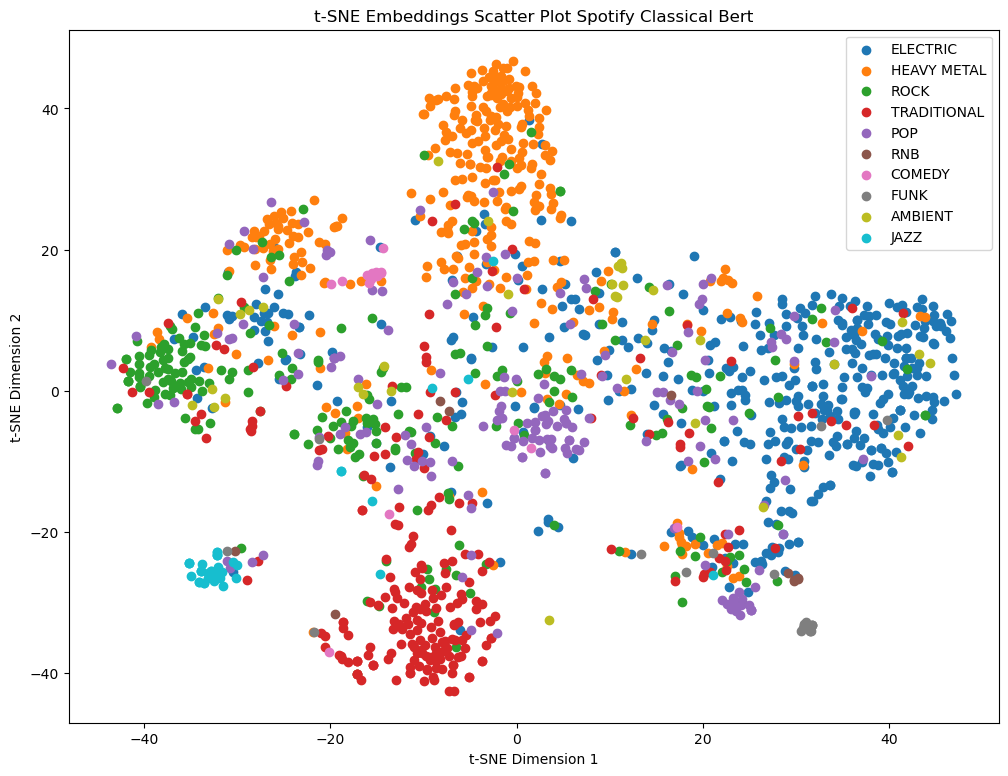

In [11]:
plot_tsne('spotify_classical_bert', 
          LyricsDataset, 
          x_val_spot,
          y_val_spot, 
          num_labels_spot, 
          idx_to_genre, 
          'Spotify Classical Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1552, 2)
1552


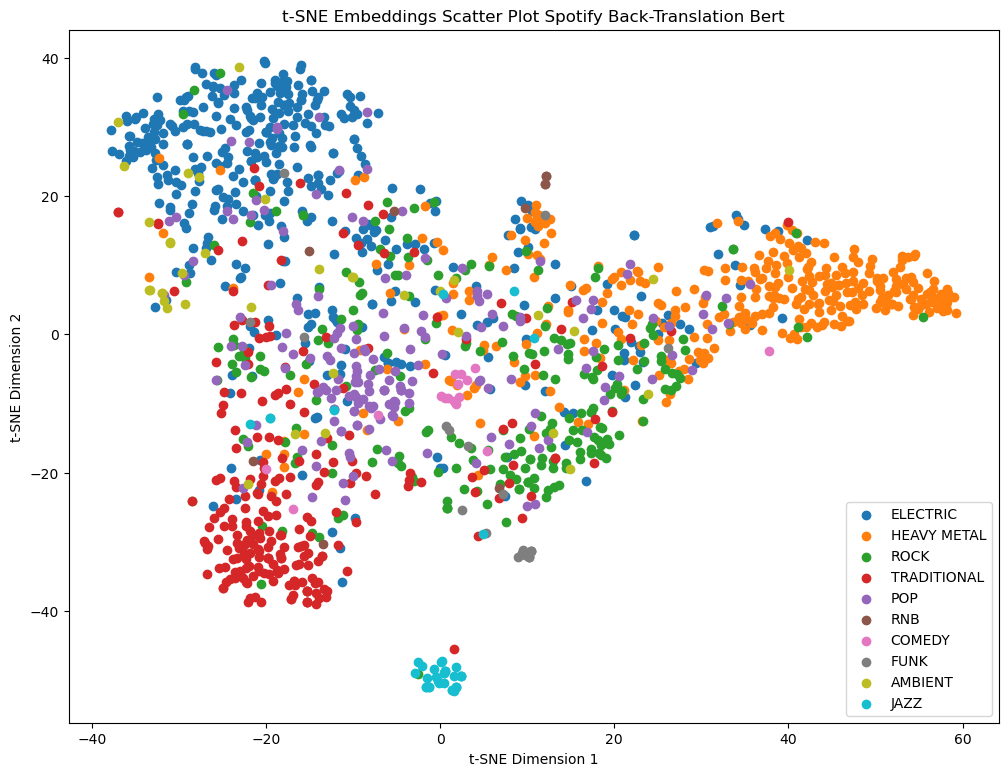

In [12]:
plot_tsne('spotify_backtrans_bert', 
          LyricsDataset, 
          x_val_spot,
          y_val_spot, 
          num_labels_spot, 
          idx_to_genre, 
          'Spotify Back-Translation Bert')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\unsee\OneDrive\Desktop\pytorch_test\Bert_Trainer.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializat

(1552, 2)
1552


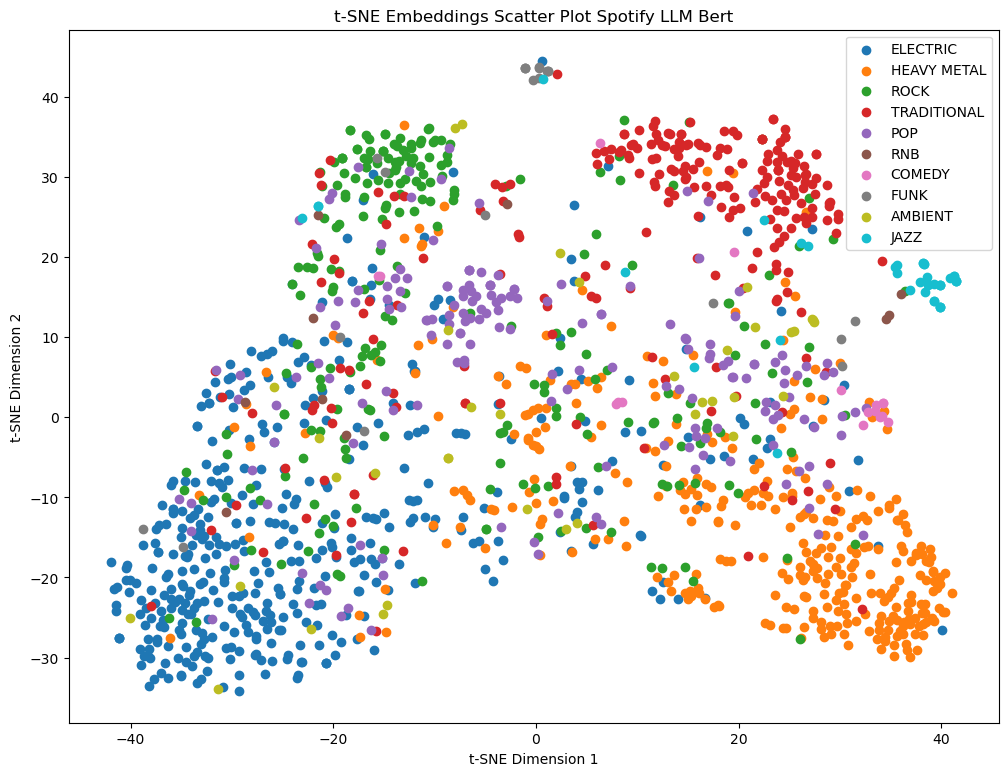

In [13]:
plot_tsne('spotify_llm_bert', 
          LyricsDataset, 
          x_val_spot,
          y_val_spot, 
          num_labels_spot, 
          idx_to_genre, 
          'Spotify LLM Bert')